Let's load the Eiffel tower image as RGB.

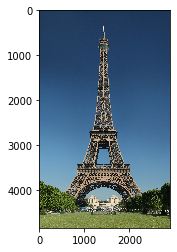

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg'
pillow_im = Image.open(requests.get(url, stream=True).raw)
img = np.array(pillow_im)

plt.imshow(img)

Now let's make it gray and do some image processing on it.

In [45]:
from skimage.color import rgb2gray

gray = rgb2gray(img)

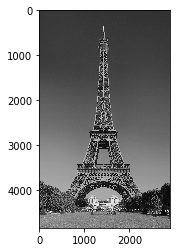

In [50]:
plt.imshow(gray, cmap='gray')

In [47]:
from skimage import exposure

In [65]:
equalized = exposure.equalize_adapthist(gray, kernel_size=(100, 200))

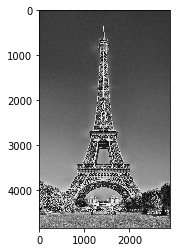

In [66]:
plt.imshow(equalized, cmap='gray')

In [67]:
equalized2 = exposure.equalize_adapthist(equalized, kernel_size=(100, 200))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


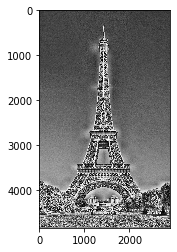

In [68]:
plt.imshow(equalized2, cmap='gray')

Text(0.5, 1.0, 'Hysteresis threshold')

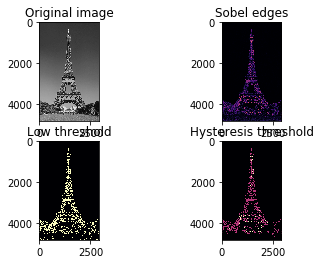

In [73]:
from skimage import filters
image = gray
edges = filters.sobel(image)

low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')


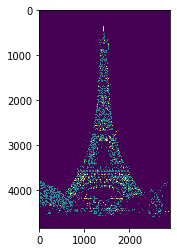

In [77]:
plt.imshow(hight + hyst)

In [78]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

In [87]:
dilated = dilation(hight + hyst, selem=np.ones((30, 20)))

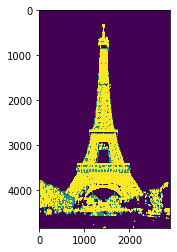

In [88]:
plt.imshow(dilated)

Now, let's build the triangle mesh.

In [119]:
from skimage.transform import rescale, resize

In [133]:
rescaled = rescale(dilated, scale=0.04, multichannel=False)
rescaled /= rescaled.max()

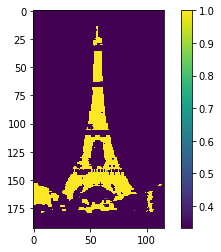

In [134]:
plt.imshow(rescaled)
plt.colorbar()

In [153]:
points = np.nonzero(rescaled > 0.5)

points[0].size

2902

(20.640143369175625, 94.35985663082437, -187.2651766004415, -5.734823399558499)

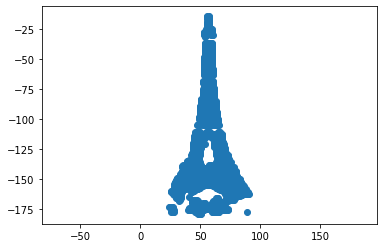

In [156]:
fig, ax = plt.subplots()
x_coords, y_coords = points[1], -points[0]
selection = (x_coords>22) & (x_coords<97)
x_coords, y_coords = x_coords[selection], y_coords[selection]
ax.scatter(x_coords, y_coords)
ax.axis('equal')

(20.640143369175625, 94.35985663082437, -187.2651766004415, -5.734823399558499)

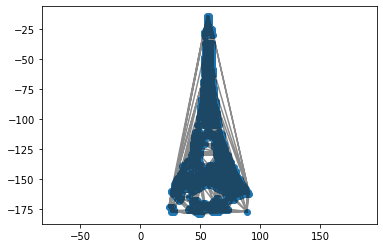

In [157]:
tri = Triangulation(x_coords, y_coords)

fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)
ax.triplot(tri, color='0.1', alpha=.5)
ax.axis('equal')